This dataset comes from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data and is a classification problem on determining whether a tumor is benign or malignant in patients diagnosed with breast cancer.

Although a common approach to this dataset would be to use a classifier model like gradient boosting or random forests, I think it'd be more fun to tackle this dataset with a neural network.

# Imports and Data

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
data = pd.read_csv('data.csv')

# View/Clean Data

In [13]:
# Quick look at examples
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  sm

The classification will be M (Malignant) or B (Benign). The information given is real values of the tumors inside the patients.

I don't know what Unnamed: 32 means, so we'll just drop that column.

In [14]:
data.drop('Unnamed: 32', axis=1, inplace=True)

Let's see how much of our data is benign compared to malignant.

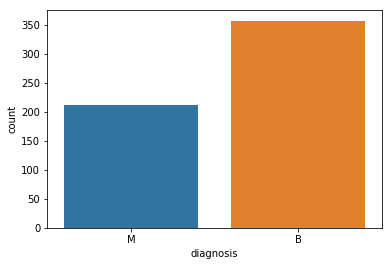

In [23]:
sns.countplot(x='diagnosis', data=data)

With about 350 benign and a bit over 200 malignant we don't have that much data, but at least the counts of each category are not vastly different.

# Making Data Workable

In [27]:
x = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# We'll need to turn the "M" and "B" into categories our machine can understand.

from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(y)

# Create Train and Test data
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y)

# Feature Scaling (More can be read here as to why this is important:)
# https://www.wikiwand.com/en/Feature_scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

# Building/Training Model with Keras

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Check the docs for the Sequential model here https://keras.io/models/sequential/

model = Sequential()

# Input Layer
model.add(Dense(16, activation='relu'))

# Dropout to prevent overfitting
model.add(Dropout(.25))

# Repeat
model.add(Dense(16, activation='relu'))
model.add(Dropout(.25))

# Output
# Sigmoid function is used here as the activation since this is classification.
# tanh could be used if this was a regression problem
model.add(Dense(output_dim=1, activation='sigmoid'))

# Compile Model
# Our loss used is cross entropy which can be read on here:
# http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
# To sum it up, smaller values for loss are better for accuracy.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Training Time!

In [42]:
model.fit(xTrain, yTrain, steps_per_epoch=500, epochs=20)

Epoch 1/20
500/500 [==============================] - 1s 3ms/step - loss: 0.1139 - acc: 0.9654
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0154 - acc: 0.9952
Epoch 3/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0058 - acc: 0.9985
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0038 - acc: 0.9988
Epoch 5/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0026 - acc: 0.9993
Epoch 6/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0018 - acc: 0.9995
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0014 - acc: 0.9996
Epoch 8/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0014 - acc: 0.9995
Epoch 9/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0011 - acc: 0.9997
Epoch 10/20
500/500 [==============================] - 1s 2ms/step - loss: 7.8979e-04 - acc: 0.9997
Epoch 11/20
500/500 [========================

**Wow!** That is incredibly accurate. Hopefully this is not a sign of overtraining our data. We'll find out by testing the model now.

# Testing Model

In [56]:
predictions = model.predict(xTest)

# Testing accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(yTest, predictions.round())

print("Neural Network Accuracy: {}%".format((accuracy * 100).round(4)))


Model Accuracy: 96.5035%


# Compare to XGBClassifier

In [62]:
# I'll create a model quickly without too much explanation.

from xgboost import XGBClassifier

x = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

xTrain, xTest, yTrain, yTest = train_test_split(x,y)

model = XGBClassifier()

model.fit(xTrain, yTrain)

predictions = model.predict(xTest)

accuracy = accuracy_score(yTest, predictions)

print("XGBClassifier Accuracy: {}%".format((accuracy * 100).round(4)))


XGBClassifier Accuracy: 98.6014%


# Conclusion/Final Thoughts

This notebook was made in under 5 hours and was more of a way for me to learn neural networks on tabular data. It's not meant as a way to create state of the art predictions with 99.99% accuracy. I did not tinker the Neural Network much and I didn't give any extra parameters to the XGBClassifier. 

I'm sure with more time and more data you could easily get the NN model to have 99% accuracy.